In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
import math
import warnings

from IPython.display import display
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

warnings.filterwarnings(
    action='ignore',
    module='scipy',
    message='^internal gelsd')
warnings.filterwarnings(
    action='ignore',
    module='scipy',
    message='FutureWarning:')

/root/.pyenv/versions/3.6.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/root/.pyenv/versions/3.6.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
#Load data
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


In [4]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales']
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)
#call results
print('\nCoefficients: \n',regr.coef_)
print('\nIntercept: \n',regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))


Coefficients: 
 [ 0.04576465  0.18853002 -0.00103749]

Intercept: 
 2.9388893694594103

R-squared:
0.8972106381789521


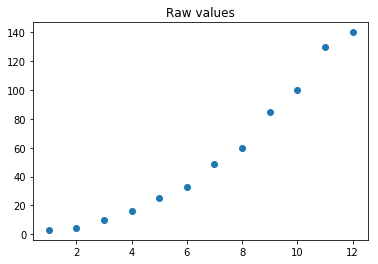

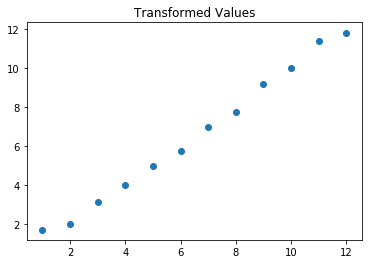

In [5]:
#Dealing with non linearity #sqrt/log
outcome = [1,2,3,4,5,6,7,8,9,10,11,12]
feature = [3,4,10,16,25,33,49,60,85,100,130,140]

plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

sqrt_feature = [math.sqrt(x) for x in feature]

plt.scatter(outcome, sqrt_feature)
plt.title('Transformed Values')
plt.show()

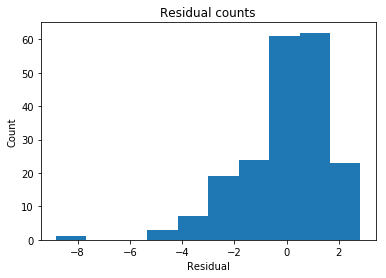

In [6]:
#multivariate normality
predicted = regr.predict(X).ravel()
actual = data['Sales']

#calculate the error, residual
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

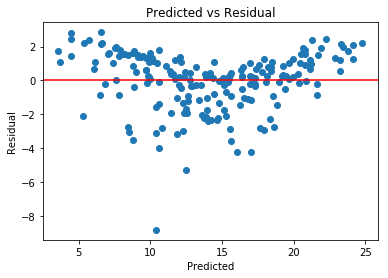

In [7]:
#homoskedasticity
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline(y=0,color='red')
plt.title('Predicted vs Residual')
plt.show()
#this is concerning

In [8]:
#what can be done to fix these problems?

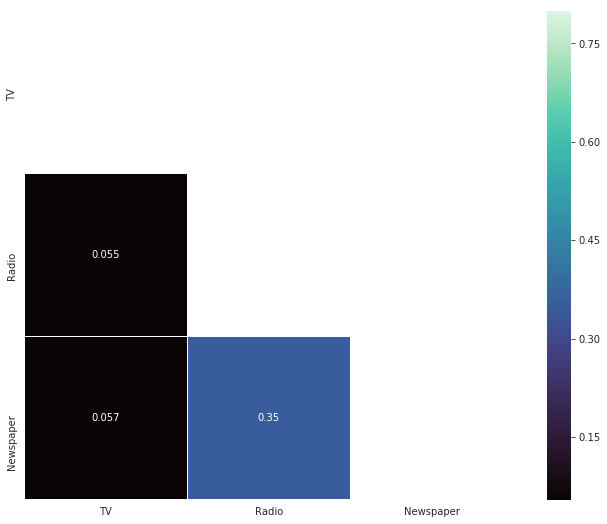

In [9]:
#create heat map to show correlation between variables.
mediums = data[['TV','Radio','Newspaper']]
corrmat = mediums.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
    
with sns.axes_style('white'):    
    ax = plt.subplots(figsize=(12,9))

    sns.heatmap(corrmat,
            vmax=.8, 
            cmap="mako",
            annot=True,
            linewidth=.05,
            square=True,
            mask=mask)


plt.show()

/root/.pyenv/versions/jupyter3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


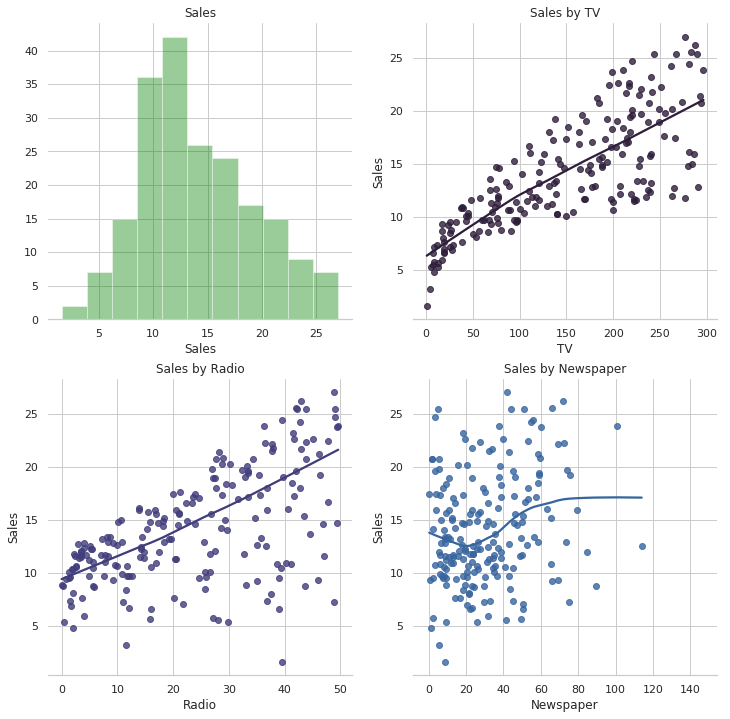

In [10]:
#it looks like Radio and News Paper seem to have a similar relationship to TV
#lets take a look at the relationships to sales
sns.set(style="whitegrid", palette="mako", color_codes=True)

f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=False)
sns.despine(left=True)


sns.distplot(data['Sales'], color='g', kde=False, ax=axes[0, 0]).set_title("Sales")


sns.regplot(y='Sales',x='TV',data=data, lowess=True,ax=axes[0, 1]).set_title("Sales by TV")


sns.regplot(y='Sales', x='Radio', data=data, lowess=True, ax=axes[1, 0]).set_title('Sales by Radio')

sns.regplot(y='Sales',x='Newspaper', data=data, lowess=True, ax=axes[1, 1]).set_title('Sales by Newspaper')

plt.show()



This visualization shows the distribution of sales, and its relationship with each medium.
Radio is somewhat linear
TV looks logrithmic
Newespaper looks scattered.
lets fix TV first

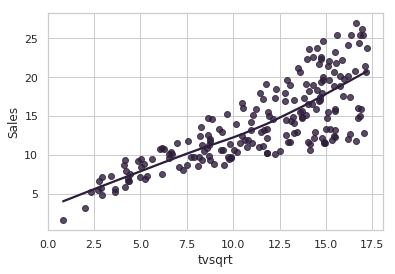

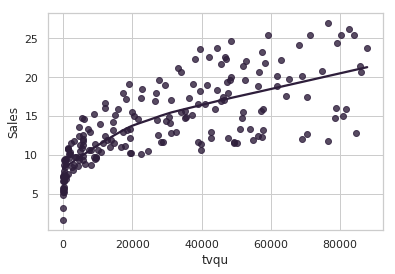

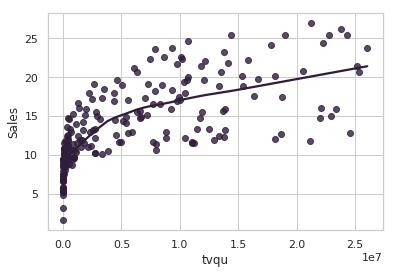

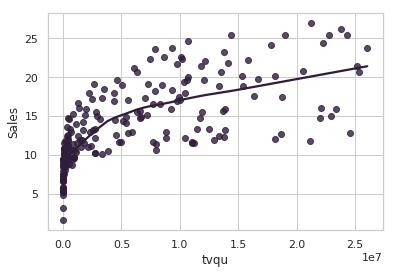

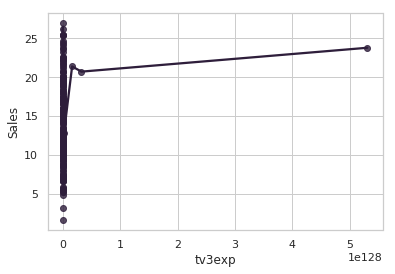

In [11]:
#data['logtv'] = np.log(data['TV'])
data['tvsqrt'] = [math.sqrt(x) for x in data['TV']]
g = sns.regplot(y='Sales',x='tvsqrt', data=data, lowess=True)
plt.show()
#data['tvsqrtlog'] = np.log(data['tvsqrt'])
#g = sns.regplot(y='Sales',x='tvsqrtlog', data=data, lowess=True)
#plt.show()
data['tvqu'] = data['TV']**2
g = sns.regplot(y='Sales',x='tvqu', data=data, lowess=True)
plt.show()
data['tvqu'] = data['TV']**3
g = sns.regplot(y='Sales',x='tvqu', data=data, lowess=True)
plt.show()
data['tvqu'] = data['TV']**3
g = sns.regplot(y='Sales',x='tvqu', data=data, lowess=True)
plt.show()
data['tv3exp'] = np.e**data['TV']
g = sns.regplot(y='Sales',x='tv3exp', data=data, lowess=True)
plt.show()

#The only acceptable transfomration is the first

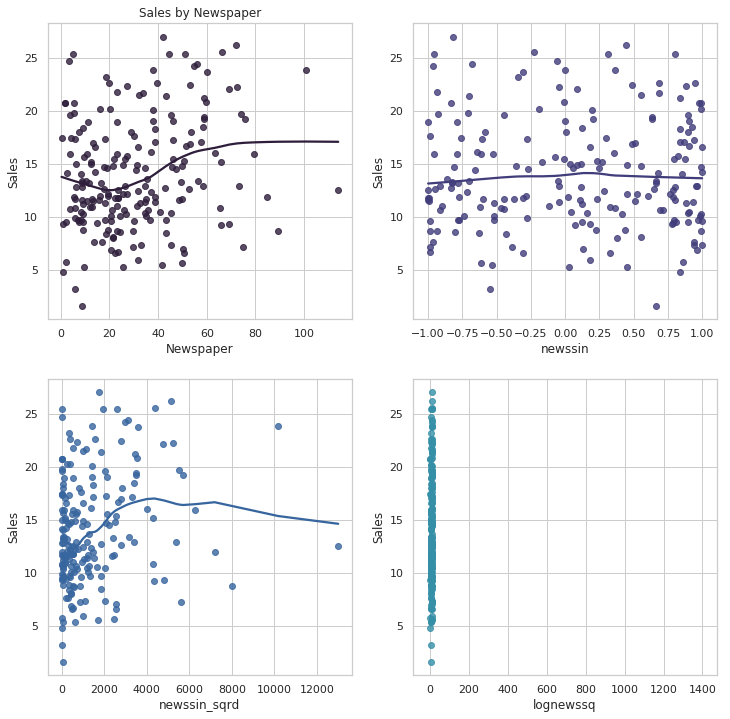

In [12]:
#Show a transformation
f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=False)

sns.regplot(y='Sales',x='Newspaper', data=data, lowess=True, ax=axes[0, 0]).set_title('Sales by Newspaper')

data['newssin'] = [math.sin(x) for x in data['Newspaper']]

g = sns.regplot(y='Sales',x='newssin', data=data, lowess=True, ax=axes[0,1])


data['newssin_sqrd'] = data['Newspaper']**2

g = sns.regplot(y='Sales',x='newssin_sqrd', data=data, lowess=True, ax=axes[1,0])

data['lognewssq'] = np.log(data['newssin_sqrd'])

g = sns.regplot(y='Sales',x='lognewssq', data=data, lowess=True, ax=axes[1,1])
plt.show()

In [13]:
means = data[['Radio','Newspaper']].mean(axis=0)
stds = data[['Radio','Newspaper']].std(axis=0)
data['rad_news'] = ((data[['Radio','Newspaper']] - means)/ stds).mean(axis=1)
plot = data.loc[:,['Radio','Newspaper','rad_news']]
corrmat = plot.corr()
print(corrmat)

           Radio  Newspaper  rad_news
Radio      1.000      0.354     0.823
Newspaper  0.354      1.000     0.823
rad_news   0.823      0.823     1.000


In [14]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales,tvsqrt,tvqu,tv3exp,newssin,newssin_sqrd,lognewssq,rad_news
0,1,230.100,37.800,69.200,22.100,15.169,12182876.901,85341502750241180214885830758696509157166946432...,0.085,4788.640,8.474,1.377
1,2,44.500,39.300,45.100,10.400,6.671,88121.125,21188706471076339712.000,0.899,2034.010,7.618,0.874
2,3,17.200,45.900,69.300,9.300,4.147,5088.448,29502925.916,0.184,4802.490,8.477,1.652
3,4,151.500,41.300,58.500,18.500,12.309,3477265.875,62461729948979113634098443599548069186792939496...,0.928,3422.250,8.138,1.249
4,5,180.800,10.800,58.400,12.900,13.446,5910106.112,33146854970900300928813260445765462635974921035...,0.961,3410.560,8.135,0.220


In [15]:
#new model
Y = data['Sales']
X = data[['tvsqrt','rad_news']]
regr.fit(X, Y)
#call results
print('\nCoefficients: \n',regr.coef_)
print('\nIntercept: \n',regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))


Coefficients: 
 [0.96973103 2.88141679]

Intercept: 
 2.965231618354581

R-squared:
0.8289845407201145


In [16]:
Y = data['Sales']
X = data[['TV','rad_news']]
regr.fit(X, Y)
#call results
print('\nCoefficients: \n',regr.coef_)
print('\nIntercept: \n',regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))


Coefficients: 
 [0.04573428 2.77668858]

Intercept: 
 7.297616742013837

R-squared:
0.802755705480537


In [17]:
Y = data['Sales']
X = data[['tvsqrt','Radio', 'Newspaper']]
regr.fit(X, Y)
#call results
print('\nCoefficients: \n',regr.coef_)
print('\nIntercept: \n',regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))


Coefficients: 
 [ 9.74947557e-01  1.94767873e-01 -5.25277959e-04]

Intercept: 
 -1.6092798375689696

R-squared:
0.9289549053811124


A little better

In [18]:
Y = data['Sales']
X = data[['tvsqrt','Radio', 'newssin']]
regr.fit(X, Y)
#call results
print('\nCoefficients: \n',regr.coef_)
print('\nIntercept: \n',regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))


Coefficients: 
 [ 0.97387449  0.19506386 -0.13204402]

Intercept: 
 -1.6112764510152395

R-squared:
0.9292387314761082


In [19]:
data['radsqrt'] = np.sqrt(data['Radio'])
Y = data['Sales']
X = data[['tvsqrt','radsqrt', 'lognewssq']]
regr.fit(X, Y)
#call results
print('\nCoefficients: \n',regr.coef_)
print('\nIntercept: \n',regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))


Coefficients: 
 [0.96813984 1.56471919 0.02889751]

Intercept: 
 -4.215004589512201

R-squared:
0.9082132731109283


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
data_pca = data[['tvsqrt','Newspaper','Radio']]

X = StandardScaler().fit_transform(data_pca)
sklearn_pca = PCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)
print(sklearn_pca.explained_variance_ratio_)

[0.45387515 0.33093075]


In [21]:
data_pca.head()

,tvsqrt,Newspaper,Radio
0,15.169,69.200,37.800
1,6.671,45.100,39.300
2,4.147,69.300,45.900
3,12.309,58.500,41.300
4,13.446,58.400,10.800


In [22]:
#the best R2
X = data[['tvsqrt','Radio', 'newssin']]
regr.fit(X, Y)
#call results
print('\nCoefficients: \n',regr.coef_)
print('\nIntercept: \n',regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))


Coefficients: 
 [ 0.97387449  0.19506386 -0.13204402]

Intercept: 
 -1.6112764510152395

R-squared:
0.9292387314761082


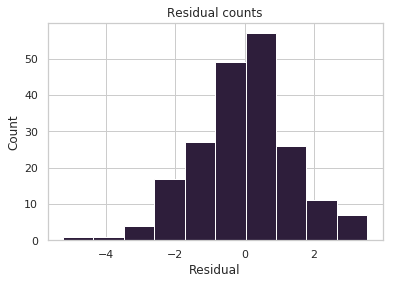

In [23]:
#multivariate normality
predicted = regr.predict(X).ravel()
actual = data['Sales']

#calculate the error, residual
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

In [24]:
#this ditribution look better than the first

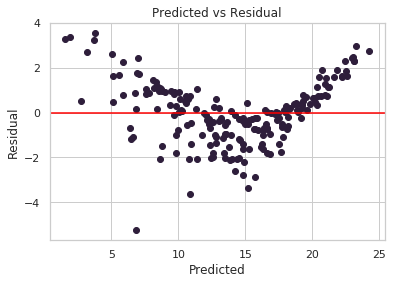

In [25]:
#homoskedasticity
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline(y=0,color='red')
plt.title('Predicted vs Residual')
plt.show()
#this is concerning

In [26]:
#Didnt really fix much here

In [27]:
Y = data['Sales']
X = data[['tvsqrt','rad_news']]
regr.fit(X, Y)
#call results
print('\nCoefficients: \n',regr.coef_)
print('\nIntercept: \n',regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))


Coefficients: 
 [0.96973103 2.88141679]

Intercept: 
 2.965231618354581

R-squared:
0.8289845407201145


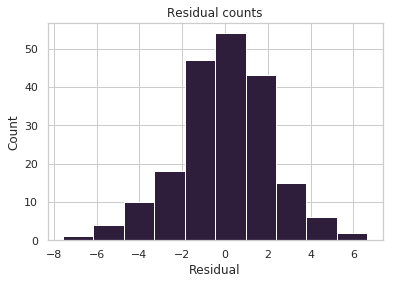

In [28]:
#multivariate normality
predicted = regr.predict(X).ravel()
actual = data['Sales']

#calculate the error, residual
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

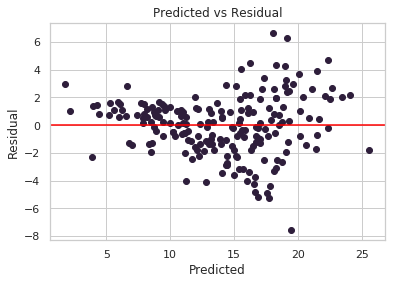

In [29]:
#homoskedasticity
plt.scatter(predicted, residual)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.axhline(y=0,color='red')
plt.title('Predicted vs Residual')
plt.show()
#this is concerning